In [78]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

In [79]:
dataset = 'wisconsin'
split = '3'

# multiples = 40
h_dir = '../pygcn/h_vis/' + str(dataset) + '/' + str(split) + '/'


In [80]:
epoch_list = []
for file in os.listdir(h_dir):
    if file != 'label.pt':
        name = file.split('.')[0]
        name = name.split('_')[1]        
        epoch_list.append(int(name))

epoch = max(epoch_list)
print(epoch)

519


In [81]:
h_file = h_dir + 'x_' + str(epoch) + '.pt'
label_file = h_dir + 'label.pt'

In [82]:
h = torch.load(h_file)
label = torch.load(label_file)

In [83]:
h = h.detach().numpy()
label = label.detach().numpy()

In [84]:
h.shape

(251, 5)

In [85]:
label.shape

(251,)

In [86]:
# array([3, 0, 2, 3, 4, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 0, 3, 0, 3,
#        3, 3, 3, 1, 3, 3, 0, 2, 3, 3, 4, 3, 4, 4, 2, 3, 3, 3, 0, 4, 0, 3,
#        3, 3, 2, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 2, 2, 4, 4, 4, 3, 3, 3, 3,
#        0, 3, 3, 3, 4, 3, 3, 4, 4, 3, 0, 3, 0, 3, 4, 3, 2, 4, 2, 4, 3, 3,
#        0, 3, 3, 3, 0, 3, 3, 4, 3, 3, 3, 4, 0, 0, 4, 3, 3, 0, 4, 3, 2, 3,
#        3, 0, 3, 0, 0, 3, 3, 4, 3, 3, 3, 0, 3, 0, 3, 2, 4, 2, 3, 3, 0, 4,
#        3, 4, 3, 4, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 3,
#        3, 3, 0, 2, 0, 2, 3, 3, 4, 3, 0, 3, 3, 2, 0, 3, 3, 4, 3, 2, 0, 3,
#        0, 4, 3, 3, 4, 3, 3])

In [87]:
h

array([[-0.41762632,  7.49952168, -0.6563621 , -1.47889597, -4.93227903],
       [-0.38055068, -2.34505971,  8.11294017, -3.68096251, -7.84120855],
       [-0.36394609, -7.38405095,  7.94575455,  0.78352161, -8.03204774],
       ...,
       [-0.42304396,  1.32465866, 12.56491439, -4.35130063, -2.43691453],
       [-0.41541246,  8.19531349,  0.50116954, -4.27302986, -5.8033517 ],
       [-0.39964553,  0.76514762,  9.13960295, -4.9280907 , -1.51172785]])

In [88]:
label

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1,
       2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 3, 2, 2, 1, 2,
       4, 2, 4, 3, 1, 2, 4, 4, 1, 1, 3, 2, 2, 2, 3, 1, 1, 2, 2, 4, 4, 2,
       1, 0, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 4, 2, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 4, 3, 2, 2, 2, 1, 1, 2, 0, 3, 3, 2, 2, 2, 2, 3, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 3, 4, 2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 1, 0,
       2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 0, 3, 2, 3, 4, 1, 1, 1, 0, 1, 2,
       2, 2, 4, 4, 1, 4, 3, 4, 2, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 3, 2, 1, 2, 0, 4, 2, 4, 0, 1, 1, 2, 1, 3, 2, 2, 2, 1, 3,
       4, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 4, 2, 1, 1, 2, 1, 3, 3,
       2, 2, 1, 3, 1, 2, 2, 2, 1, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       1, 1, 4, 1, 2, 2, 2, 1, 2])

In [89]:
dl, ln = np.unique(label, return_counts=True)

In [90]:
dl

array([0, 1, 2, 3, 4])

In [91]:
# texas array([ 33,   1,  18, 101,  30])
# wisconsin array([ 10,  70, 118,  32,  21])
# cornell array([ 33,   1,  18, 101,  30])
ln

array([ 10,  70, 118,  32,  21])

In [92]:
new_index = [0] * label.shape[0]
new_label_index = [0] * len(dl)
for i in range(1, len(new_label_index)):
    new_label_index[i] = new_label_index[i-1] + ln[i-1]
print(new_label_index)

for i in range(label.shape[0]):
    for l in dl:
        if label[i] == l:
            new_index[i] = new_label_index[l]
            new_label_index[l] += 1

print(new_index)


[0, 10, 80, 198, 230]
[10, 80, 81, 82, 11, 12, 13, 14, 83, 0, 84, 85, 86, 87, 88, 89, 90, 91, 198, 92, 15, 16, 93, 94, 17, 199, 18, 200, 19, 95, 96, 97, 98, 99, 20, 21, 22, 201, 23, 202, 100, 101, 24, 102, 230, 103, 231, 203, 25, 104, 232, 233, 26, 27, 204, 105, 106, 107, 205, 28, 29, 108, 109, 234, 235, 110, 30, 1, 111, 112, 113, 114, 115, 116, 31, 206, 117, 118, 32, 236, 119, 120, 33, 34, 35, 121, 122, 36, 123, 37, 124, 38, 237, 207, 125, 126, 127, 39, 40, 128, 2, 208, 209, 129, 130, 131, 132, 210, 41, 133, 42, 134, 43, 44, 135, 45, 46, 136, 211, 238, 137, 212, 138, 139, 140, 141, 213, 47, 48, 142, 49, 3, 143, 144, 145, 4, 146, 214, 5, 147, 148, 149, 150, 6, 215, 151, 216, 239, 50, 51, 52, 7, 53, 152, 153, 154, 240, 241, 54, 242, 217, 243, 155, 156, 157, 244, 158, 55, 159, 160, 161, 162, 163, 218, 164, 219, 220, 165, 221, 222, 166, 56, 167, 8, 245, 168, 246, 9, 57, 58, 169, 59, 223, 170, 171, 172, 60, 224, 247, 61, 62, 63, 173, 174, 64, 65, 66, 67, 68, 175, 225, 176, 248, 177, 69, 70

In [93]:
h_new = h * 1

for i in range(h.shape[0]):
    h_new[new_index[i]] = h[i]

In [94]:
h_new

array([[ -0.36976343,  -0.98605013,   0.83723128,  -0.51970067,
         -3.07904519],
       [ -0.28404248,  -5.79074059,  -6.80449549,  -6.4686033 ,
         -6.58957672],
       [ -0.35394626,  -1.9407593 ,  -0.44446601,  -1.59963729,
         -3.86374008],
       ...,
       [ -0.35587043,  -2.81705021,   9.7466031 , -13.66310235,
          2.64414079],
       [ -0.37877063,   0.51504649,  -0.30079043,   0.66659957,
          2.03221718],
       [ -0.33487874,  -3.02450947,  -1.53431485,  -3.88709741,
          6.95742286]])

In [95]:
def get_min_max(z):
    l_max = []
    l_min = []
    for zl in z:
        l_max.append(max(zl))
        l_min.append(min(zl))
    print(max(l_max))
    print(min(l_min))

In [96]:

def normalize_array(m):
    for i in range(m.shape[0]):
        abs_max = max([np.abs(m[i][j]) for j in range(m.shape[1])])
        for j in range(m.shape[1]):
            m[i][j] = m[i][j] / abs_max
    return m

In [97]:
h = normalize_array(h)
print(h)

[[-0.05568706  1.         -0.08752053 -0.19719871 -0.65767915]
 [-0.04690663 -0.28905177  1.         -0.45371498 -0.9665064 ]
 [-0.04531174 -0.91932359  0.98925639  0.09754942 -1.        ]
 ...
 [-0.03366867  0.1054252   1.         -0.34630563 -0.19394597]
 [-0.05068903  1.          0.06115319 -0.5213992  -0.70813053]
 [-0.04372679  0.08371782  1.         -0.53920184 -0.16540411]]


In [98]:
h_new = normalize_array(h_new)
print(h_new)

[[-0.12009029 -0.32024542  0.27191263 -0.16878631 -1.        ]
 [-0.04174336 -0.85101689 -1.         -0.95063672 -0.96841518]
 [-0.09160716 -0.50230069 -0.11503517 -0.41401265 -1.        ]
 ...
 [-0.02604609 -0.2061794   0.71335213 -1.          0.19352419]
 [-0.18638295  0.25344067 -0.14801097  0.32801591  1.        ]
 [-0.04813258 -0.43471692 -0.22052919 -0.55869788  1.        ]]


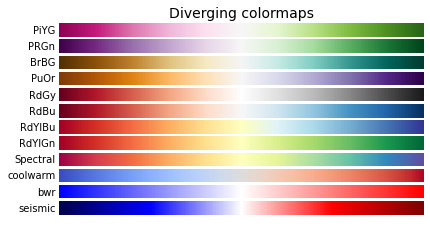

In [99]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Diverging',
                     ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'])

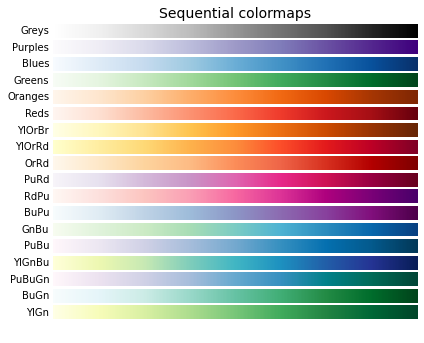

In [100]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

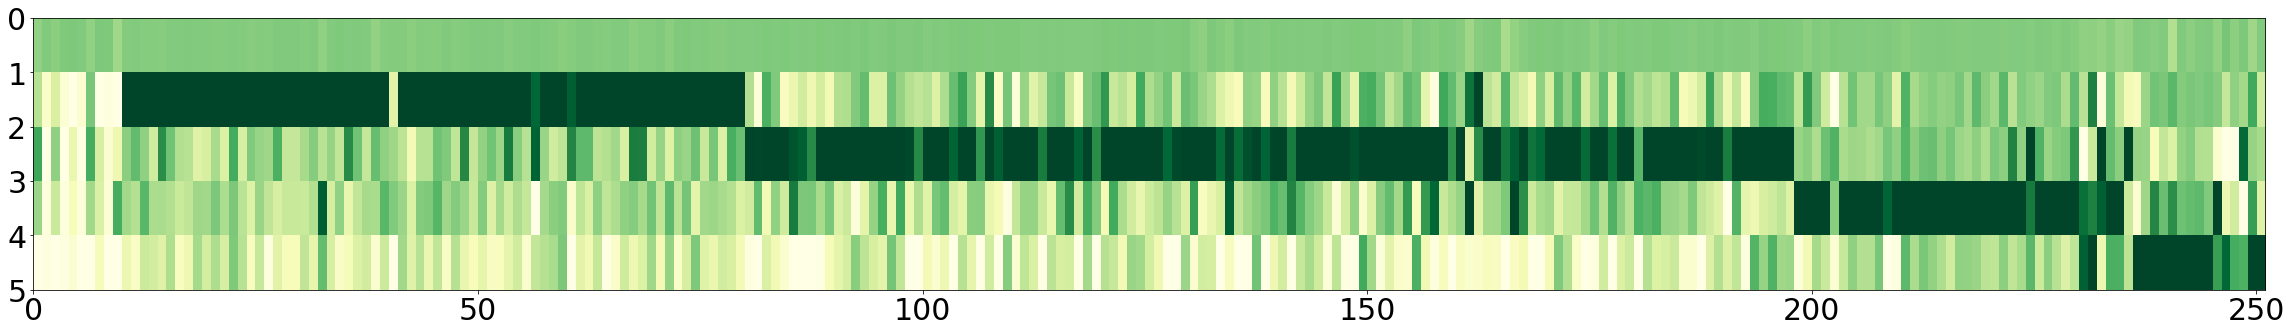

In [102]:
plt.figure(figsize = (50, 5))
plt.imshow(np.transpose(h_new), cmap='YlGn', extent=[0,251,5,0], aspect='auto')
cb = plt.colorbar() 
cb.remove()
plt.xticks(size=30)
plt.yticks(size=30)
plt.savefig('{}/{}_s{}_e{}_h.pdf'.format('h_plots', dataset, split, epoch), bbox_inches='tight')
plt.show()